<a href="https://colab.research.google.com/github/dlevine01/forecast-affordable-housing/blob/main/notebooks/regression_of_all_counted_units_based_on_parcel_factors.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Regression models for the number of affordable units



In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import linear_model
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.decomposition import PCA
import seaborn as sns
from sklearn import metrics

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
path = '/content/drive/MyDrive/ADS/ADS Project - Affordable Housing/processed data/'

In [ ]:
hny_year_before = pd.read_csv(f'{path}hny_year_before.csv',index_col=0)

In [ ]:
# combine equivilent columns that were labeled differently
hny_year_before['LANDUSE_1.0'] = hny_year_before['LANDUSE_1.0'] + hny_year_before['LANDUSE_1']
hny_year_before['LANDUSE_10.0'] = (hny_year_before['LANDUSE_10.0'] + hny_year_before['LANDUSE_10'])
hny_year_before['LANDUSE_11.0'] = (hny_year_before['LANDUSE_11.0'] + hny_year_before['LANDUSE_11'])
hny_year_before['LANDUSE_2.0'] = (hny_year_before['LANDUSE_2.0'] + hny_year_before['LANDUSE_2'])
hny_year_before['LANDUSE_3.0'] = (hny_year_before['LANDUSE_3.0'] + hny_year_before['LANDUSE_3'])
hny_year_before['LANDUSE_4.0'] = (hny_year_before['LANDUSE_4.0'] + hny_year_before['LANDUSE_4'])
hny_year_before['LANDUSE_5.0'] = (hny_year_before['LANDUSE_5.0'] + hny_year_before['LANDUSE_5'])
hny_year_before['LANDUSE_6.0'] = (hny_year_before['LANDUSE_6.0'] + hny_year_before['LANDUSE_6'])
hny_year_before['LANDUSE_8.0'] = (hny_year_before['LANDUSE_8.0'] + hny_year_before['LANDUSE_8'])

In [ ]:
X_usecols = [
 'BLDGAREA',
 'COMAREA',
 'RESAREA',
 'OFFICEAREA',
 'RETAILAREA',
 'GARAGEAREA',
 'STRGEAREA',
 'FACTRYAREA',
 'OTHERAREA',
 'NUMFLOORS',
 'UNITSRES',
 'UNITSTOTAL',
 'LOTFRONT',
 'LOTDEPTH',
 'BLDGFRONT',
 'BLDGDEPTH',
 'IRRLOTCODE',
 'ASSESSLAND',
 'ASSESSTOT',
 'YEARBUILT',
 'R3-2',
 'C4-1',
 'GI',
 'M1-4',
 'LM',
 'C4-6',
 'PARK',
 'C5-5',
 'C6-4',
 'BPC',
 'M2-3',
 'C6-9',
 'C5-3',
 'C2-8',
 'R8',
 'C6-2A',
 'R7-2',
 'C1-5',
 'C6-1G',
 'TA',
 'TMU',
 'C6-3',
 'C6-3A',
 'C6-4A',
 'C6-1',
 'M1-5',
 'LI',
 'C6-2G',
 'M1-5/R10',
 'SNX',
 'M1-5/R9X',
 'M1-6',
 'HSQ',
 'M1-5/R7X',
 'C8-4',
 'C2-3',
 'C6-2',
 'C2-5',
 'R7A',
 'R8A',
 'R9-1',
 'C4-4A',
 'M3-2',
 'M1-2',
 'R8B',
 'C1-6A',
 'R7B',
 'R8X',
 'C1-7A',
 'C1-9A',
 'M1-6/R10',
 'M1-5B',
 'M1-5/R7D',
 'R6',
 'M1-5/R9A',
 'C1-7',
 'C2-6',
 'R10',
 'C4-5',
 'LC',
 'US',
 'C6-3X',
 'C6-4M',
 'C1-6',
 'C6-2M',
 'M2-4',
 'HRP',
 'MX-6',
 'R6A',
 'WCh',
 'C6-4X',
 'HY',
 'C2-6A',
 'C2-7A',
 'GC',
 'M1-6D',
 'C6-6',
 'MiD',
 'C6-4.5',
 'C5-2',
 'M1-5M',
 'R9X',
 'C5-2.5',
 'R9A',
 'C2-8A',
 'C4-5A',
 'C1-9',
 'C1-8A',
 'R9',
 'C1-8',
 'M1-1',
 'C2-7',
 'C6-7',
 'C6-5.5',
 'C6-7T',
 'C6-6.5',
 'C5-1',
 'R10H',
 'C6-5',
 'CL',
 'MiD/CL',
 'C4-7',
 'L',
 'R10A',
 'EC-2',
 'C4-6A',
 'EC-3',
 'C4-2F',
 'C5-P',
 'MiD/TA',
 'U',
 'SRI',
 'PI',
 'MP',
 'C1-8X',
 'C5-1A',
 'C1-4',
 'C4-5X',
 'R7D',
 'EHC',
 'C2-4',
 'EHC/TA',
 'R7X',
 'C4-4',
 'M2-2',
 '125th',
 '125th/TA',
 'C4-4D',
 'M1-6/R9',
 'C1-2',
 'M1-3/R8',
 'M3-1',
 'M1-5/R7-2',
 'MX-15',
 'MMU',
 'C8-3',
 'PC',
 'C2-1',
 'C3',
 'IN',
 'M2-1',
 'M1-4/R9A',
 'M1-4/R7A',
 'R7-1',
 'R5',
 'C1-3',
 'C4-5D',
 'R1-2',
 'NA-2',
 'J',
 'M1-5/R8A',
 'MX-1',
 'M1-2/R6A',
 'HRW',
 'MX-13',
 'M1-4/R7X',
 'M1-4/R6A',
 'M1-4/R8A',
 'M1-1/R7-2',
 'MX-7',
 'C',
 'C6-3D',
 'C8-1',
 'M1-4/R7D',
 'M1-3',
 'MX-18',
 'C8-2',
 'HP',
 'M1-2/R7-2',
 'MX-17',
 'MX-14',
 'C4-2',
 'R4A',
 'R6B',
 'R5B',
 'R5A',
 'R5D',
 'C2-2',
 'R3A',
 'C1-1',
 'R4',
 'R4-1',
 'R3-1',
 'R3X',
 'C4-3',
 'C7',
 'R2',
 'C3A',
 'CD',
 'R1-1',
 'MX-2',
 'M1-6/R8X',
 'M1-2/R8',
 'M1-2/R8A',
 'M1-5/R9-1',
 'M1-2/R6',
 'DB',
 'C6-1A',
 'C5-4',
 'EC-1',
 'G',
 'SV-1',
 'C5-2A',
 'M1-4/R6B',
 'M1-4/R7-2',
 'MX-11',
 'M1-1/R5',
 'MX-5',
 'M1-2D',
 'M1-1D',
 'C4-3A',
 'MX-20',
 'C4-4L',
 'EC-4',
 'MX-16/EC-5',
 'EC-5',
 'M1-1/R7D',
 'MX-10',
 'MX-4',
 'BNY',
 'R7-3',
 'MX-8',
 'M1-2/R7A',
 'M1-2/R6B',
 'MX-22',
 'MX-19',
 'EC-6',
 'MX-16',
 'M1-1/R6A',
 'MX-16/EC-6',
 'MX-12',
 'OP',
 'C4-2A',
 'R4B',
 'BR',
 'R2X',
 'CO',
 'CI',
 'SB',
 'CR-4',
 'SHP',
 'LIC',
 'M1-5/R9',
 'M1-5/R7-3',
 'MX-23',
 'M1-2/R5D',
 'M1-2/R5B',
 'M1-3/R7X',
 'MX-9',
 'R2A',
 'WP',
 'R1-2A',
 'FH',
 'M1-4D',
 'CP',
 'FW',
 'M1-2/R7-1',
 'NA-4',
 'DJ',
 'CR-2',
 'CR-1',
 'DFR',
 'M1-4/R6',
 'MX-21',
 'SG',
 'HS',
 'SW',
 'BSC',
 'NA-1',
 'SRD',
 'NA-3',
 'CR-3',
 'total: White',
 'total: Black',
 'total: Asian',
 'total: Hispanic or Latino (any race)',
 'median income',
 'total: income below poverty level',
 'median gross rent',
 'total: paying >50 percent of income on rent',
 'rezoned',
 'Reporting Construction Type_New Construction',
 'Reporting Construction Type_Preservation',
 'BLDGCLASS_A0',
 'BLDGCLASS_A1',
 'BLDGCLASS_A2',
 'BLDGCLASS_A4',
 'BLDGCLASS_A5',
 'BLDGCLASS_A9',
 'BLDGCLASS_B1',
 'BLDGCLASS_B2',
 'BLDGCLASS_B3',
 'BLDGCLASS_B9',
 'BLDGCLASS_C0',
 'BLDGCLASS_C1',
 'BLDGCLASS_C2',
 'BLDGCLASS_C3',
 'BLDGCLASS_C4',
 'BLDGCLASS_C5',
 'BLDGCLASS_C6',
 'BLDGCLASS_C7',
 'BLDGCLASS_C9',
 'BLDGCLASS_D1',
 'BLDGCLASS_D2',
 'BLDGCLASS_D3',
 'BLDGCLASS_D4',
 'BLDGCLASS_D5',
 'BLDGCLASS_D6',
 'BLDGCLASS_D7',
 'BLDGCLASS_D8',
 'BLDGCLASS_D9',
 'BLDGCLASS_E1',
 'BLDGCLASS_E9',
 'BLDGCLASS_F1',
 'BLDGCLASS_F4',
 'BLDGCLASS_F5',
 'BLDGCLASS_F9',
 'BLDGCLASS_G0',
 'BLDGCLASS_G1',
 'BLDGCLASS_G2',
 'BLDGCLASS_G4',
 'BLDGCLASS_G6',
 'BLDGCLASS_G7',
 'BLDGCLASS_G8',
 'BLDGCLASS_G9',
 'BLDGCLASS_H3',
 'BLDGCLASS_H8',
 'BLDGCLASS_HR',
 'BLDGCLASS_I5',
 'BLDGCLASS_I7',
 'BLDGCLASS_I9',
 'BLDGCLASS_J2',
 'BLDGCLASS_J9',
 'BLDGCLASS_K1',
 'BLDGCLASS_K2',
 'BLDGCLASS_K4',
 'BLDGCLASS_K5',
 'BLDGCLASS_K6',
 'BLDGCLASS_K7',
 'BLDGCLASS_K9',
 'BLDGCLASS_L8',
 'BLDGCLASS_L9',
 'BLDGCLASS_M1',
 'BLDGCLASS_M4',
 'BLDGCLASS_M9',
 'BLDGCLASS_N1',
 'BLDGCLASS_N2',
 'BLDGCLASS_N9',
 'BLDGCLASS_O1',
 'BLDGCLASS_O2',
 'BLDGCLASS_O4',
 'BLDGCLASS_O5',
 'BLDGCLASS_O6',
 'BLDGCLASS_O7',
 'BLDGCLASS_O9',
 'BLDGCLASS_P2',
 'BLDGCLASS_P5',
 'BLDGCLASS_P8',
 'BLDGCLASS_Q0',
 'BLDGCLASS_Q1',
 'BLDGCLASS_Q2',
 'BLDGCLASS_Q9',
 'BLDGCLASS_S1',
 'BLDGCLASS_S2',
 'BLDGCLASS_S3',
 'BLDGCLASS_S4',
 'BLDGCLASS_S5',
 'BLDGCLASS_S9',
 'BLDGCLASS_U6',
 'BLDGCLASS_V0',
 'BLDGCLASS_V1',
 'BLDGCLASS_V3',
 'BLDGCLASS_V8',
 'BLDGCLASS_V9',
 'BLDGCLASS_W1',
 'BLDGCLASS_W2',
 'BLDGCLASS_Y4',
 'BLDGCLASS_Z2',
 'BLDGCLASS_Z9',
 'LANDUSE_1.0',
 'LANDUSE_10.0',
 'LANDUSE_11.0',
 'LANDUSE_2.0',
 'LANDUSE_3.0',
 'LANDUSE_4.0',
 'LANDUSE_5.0',
 'LANDUSE_6.0',
 'LANDUSE_7.0',
 'LANDUSE_8.0',
 'LANDUSE_9.0',
 'LOTTYPE_0.0',
 'LOTTYPE_1.0',
 'LOTTYPE_2.0',
 'LOTTYPE_3.0',
 'LOTTYPE_4.0',
 'LOTTYPE_5.0',
 'LOTTYPE_6.0',
 'LOTTYPE_7.0',
 'LOTTYPE_9.0'
]

In [ ]:
len(X_usecols)

419

In [ ]:
# Defining features and target variable
xf_df = hny_year_before[X_usecols]
yf_df = hny_year_before['All Counted Units']

## un-regularized regression

In [ ]:
from sklearn.linear_model import PoissonRegressor
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [ ]:
Xtr, Xts, ytr, yts = train_test_split(xf_df, yf_df, test_size=0.2, random_state=1)

In [ ]:
poisson_model = PoissonRegressor(verbose=3)

In [ ]:
poisson_model.fit(Xtr,ytr)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_glm/link.py:90: RuntimeWarning: overflow encountered in exp
  return np.exp(lin_pred)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_glm/link.py:93: RuntimeWarning: overflow encountered in exp
  return np.exp(lin_pred)
/usr/local/lib/python3.7/dist-packages/sklearn/_loss/glm_distribution.py:132: RuntimeWarning: invalid value encountered in true_divide
  return -2 * (y - y_pred) / self.unit_variance(y_pred)
/usr/local/lib/python3.7/dist-packages/sklearn/_loss/glm_distribution.py:323: RuntimeWarning: invalid value encountered in add
  dev = 2 * (xlogy(y, y / y_pred) - y + y_pred)
/usr/local/lib/python3.7/dist-packages/sklearn/_loss/glm_distribution.py:132: RuntimeWarning: divide by zero encountered in true_divide
  return -2 * (y - y_pred) / self.unit_variance(y_pred)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_glm/glm.py:42: RuntimeWarning: invalid value encountered in multiply
  temp = d1 * fami

PoissonRegressor(verbose=3)

In [ ]:
poisson_model.get_params()

{'alpha': 1.0,
 'fit_intercept': True,
 'max_iter': 100,
 'tol': 0.0001,
 'verbose': 3,
 'warm_start': False}

In [ ]:
poisson_model.score(Xts, yts)

-0.0015293235441991015

## standard scale data

In [ ]:
scaler = StandardScaler().fit(Xtr)

In [ ]:
Xtr_s = scaler.transform(Xtr)
Xts_s = scaler.transform(Xts)

In [ ]:
poisson_model.fit(Xtr_s,ytr)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_glm/glm.py:323: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res)


PoissonRegressor(verbose=3)

In [ ]:
poisson_model.score(Xts_s, yts)

0.7779989910475229

## test regularization

In [ ]:
Xtr_s_, Xvd, ytr_, yvd = train_test_split(Xtr_s, ytr, random_state=1)

In [ ]:
alphas = np.logspace(-4,4)
scores = []

for alpha in alphas:
  poisson_model_with_alpha = poisson_model = PoissonRegressor(alpha=alpha, verbose=1)
  poisson_model_with_alpha.fit(Xtr_s_, ytr_)
  score = poisson_model_with_alpha.score(Xvd, yvd)
  scores.append({'alpha':alpha, 'score':score})

result = pd.DataFrame(scores)
result

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_glm/glm.py:323: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_glm/glm.py:323: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_glm/glm.py:323: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as 

,alpha,score
0,0.010000,0.312085
1,0.012068,0.318892
2,0.014563,0.320482
3,0.017575,0.317137
4,0.021210,0.321044
5,0.025595,0.320006
6,0.030888,0.323839
7,0.037276,0.329336
8,0.044984,0.324994
9,0.054287,0.328283


In [ ]:
alphas = np.logspace(-1,4)
scores = []

for alpha in alphas:
  poisson_model_with_alpha = poisson_model = PoissonRegressor(alpha=alpha, verbose=1)
  poisson_model_with_alpha.fit(Xtr_s_, ytr_)
  score = poisson_model_with_alpha.score(Xvd, yvd)
  scores.append({'alpha':alpha, 'score':score})

result = pd.DataFrame(scores)
result

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_glm/glm.py:323: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_glm/glm.py:323: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_glm/glm.py:323: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as 

,alpha,score
0,0.100000,0.335825
1,0.126486,0.341798
2,0.159986,0.345588
3,0.202359,0.350037
4,0.255955,0.354309
5,0.323746,0.364008
6,0.409492,0.369854
7,0.517947,0.379572
8,0.655129,0.387565
9,0.828643,0.396984


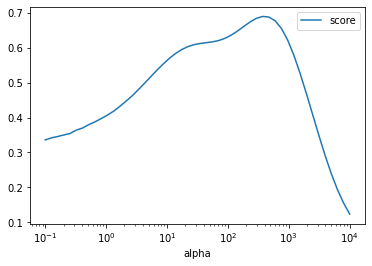

In [ ]:
result.set_index('alpha').plot(logx=True)

In [ ]:
result.set_index('alpha').idxmax()

score    372.759372
dtype: float64

In [ ]:
alpha_best = int(result.set_index('alpha').idxmax())

In [ ]:
poisson_model_with_alpha = PoissonRegressor(alpha=alpha_best)
poisson_model_with_alpha.fit(Xtr_s, ytr)

PoissonRegressor(alpha=372)

In [ ]:
poisson_model_with_alpha.score(Xts_s, yts)

0.6429553411465325

In [ ]:
coefficients = pd.DataFrame(data=poisson_model_with_alpha.coef_, index=X_usecols, columns=['Variable'])

In [ ]:
coefficients = coefficients.reindex(coefficients.abs().sort_values(by='Variable', ascending=True).index)

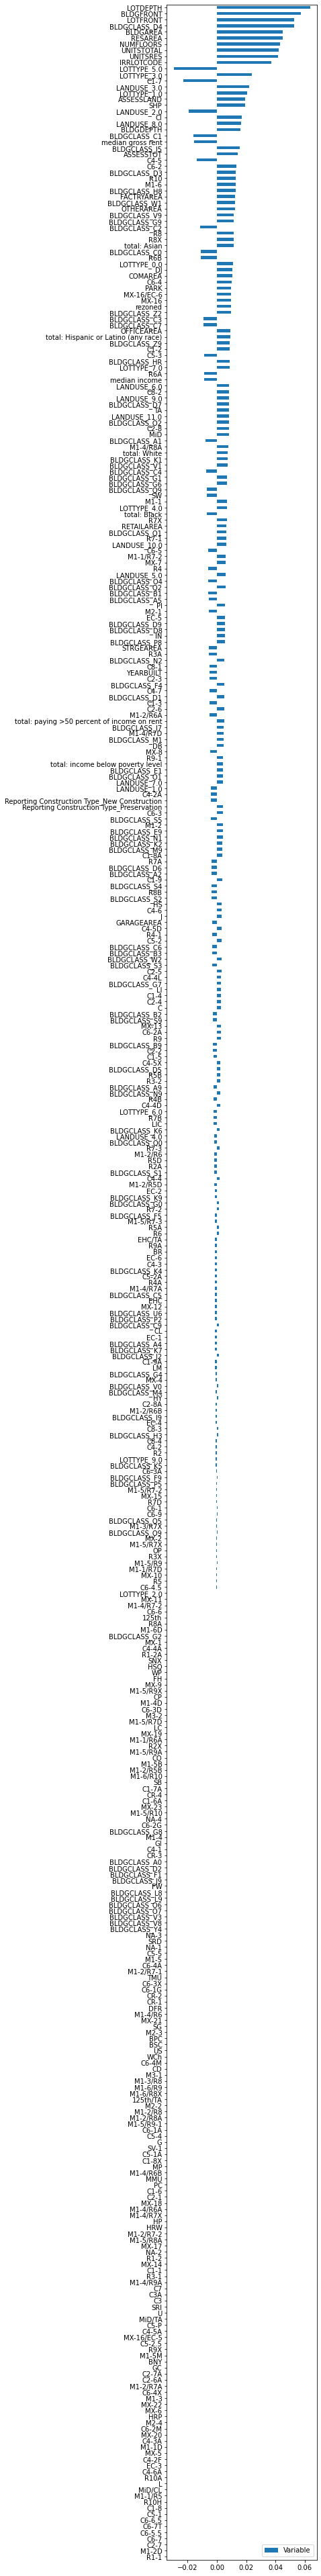

In [ ]:
coefficients.plot.barh(figsize=(4,70));

## random forest regression

In [ ]:
from sklearn.ensemble import RandomForestRegressor

In [ ]:
rf = RandomForestRegressor(
    criterion = 'poisson',
    oob_score=True,
    n_jobs=-1,
    verbose=2,
    random_state=1
)

In [ ]:
rf.fit(Xtr_s, ytr)

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 2 concurrent workers.


building tree 1 of 100
building tree 2 of 100
building tree 3 of 100
building tree 4 of 100
building tree 5 of 100
building tree 6 of 100
building tree 7 of 100
building tree 8 of 100
building tree 9 of 100
building tree 10 of 100
building tree 11 of 100
building tree 12 of 100
building tree 13 of 100
building tree 14 of 100
building tree 15 of 100
building tree 16 of 100
building tree 17 of 100
building tree 18 of 100
building tree 19 of 100
building tree 20 of 100
building tree 21 of 100
building tree 22 of 100
building tree 23 of 100
building tree 24 of 100
building tree 25 of 100
building tree 26 of 100
building tree 27 of 100
building tree 28 of 100
building tree 29 of 100
building tree 30 of 100
building tree 31 of 100
building tree 32 of 100
building tree 33 of 100
building tree 34 of 100
building tree 35 of 100
building tree 36 of 100
building tree 37 of 100
building tree 38 of 100


[Parallel(n_jobs=-1)]: Done  37 tasks      | elapsed:   21.0s


building tree 39 of 100
building tree 40 of 100
building tree 41 of 100
building tree 42 of 100
building tree 43 of 100
building tree 44 of 100
building tree 45 of 100
building tree 46 of 100
building tree 47 of 100
building tree 48 of 100
building tree 49 of 100
building tree 50 of 100
building tree 51 of 100
building tree 52 of 100
building tree 53 of 100
building tree 54 of 100
building tree 55 of 100
building tree 56 of 100
building tree 57 of 100
building tree 58 of 100
building tree 59 of 100
building tree 60 of 100
building tree 61 of 100
building tree 62 of 100
building tree 63 of 100
building tree 64 of 100
building tree 65 of 100
building tree 66 of 100
building tree 67 of 100
building tree 68 of 100
building tree 69 of 100
building tree 70 of 100
building tree 71 of 100
building tree 72 of 100
building tree 73 of 100
building tree 74 of 100
building tree 75 of 100
building tree 76 of 100
building tree 77 of 100
building tree 78 of 100
building tree 79 of 100
building tree 80

[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:   51.6s finished


RandomForestRegressor(criterion='poisson', n_jobs=-1, oob_score=True,
                      random_state=1, verbose=2)

In [ ]:
rf.score(Xts_s, yts)

[Parallel(n_jobs=2)]: Using backend ThreadingBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  37 tasks      | elapsed:    0.0s
[Parallel(n_jobs=2)]: Done 100 out of 100 | elapsed:    0.1s finished


0.6863761341490597

In [ ]:
rf_importances = pd.DataFrame(data=rf.feature_importances_, index=X_usecols, columns=['Variable']).sort_values('Variable')

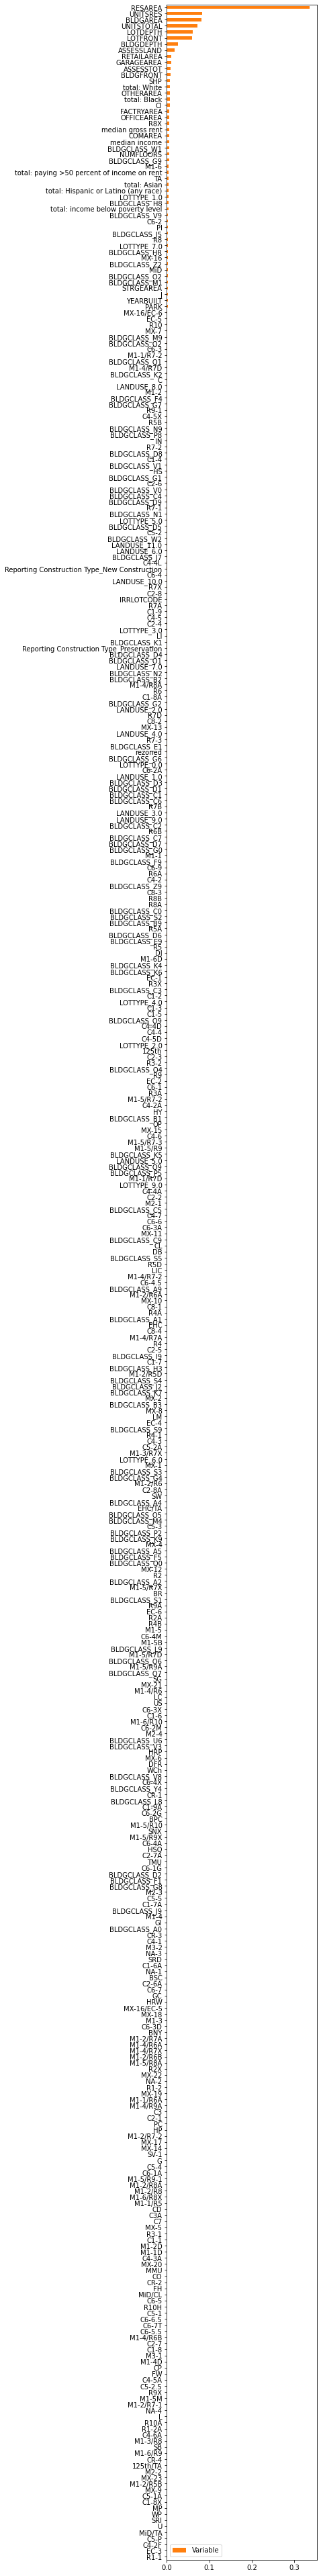

In [ ]:
rf_importances.plot.barh(figsize=(4,70), color='C1');

## use rf model to forecast (from 2021 parcel factor data)

In [ ]:
## get all features for 2021

In [ ]:
# try first 1000 rows first 
data_2021 = pd.read_csv(f'{path}full_data_2021.csv', index_col=0, skiprows= lambda x: x > 1000)

In [ ]:
data_2021 = data_2021.dropna()

In [ ]:
# the forecast model is to show the number of units _if_ the parcel is developed as new affordable housing, so model all parcels as new construction type 

data_2021['Reporting Construction Type_New Construction'] = 1
data_2021['Reporting Construction Type_Preservation'] = 0

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [ ]:
X_pred = data_2021[X_usecols]

In [ ]:
X_pred_s = scaler.transform(X_pred)

In [ ]:
y_pred = poisson_model_with_alpha.predict(X_pred_s)

In [ ]:
predicted_unit_count = pd.DataFrame(y_pred, index=data_2021['BBL'], columns=['predicted units'])

In [ ]:
predicted_unit_count.to_csv(f'{path}predicted_unit_count_sample.csv')

In [ ]:
## repeat with all rows

In [ ]:
data_2021 = pd.read_csv(f'{path}full_data_2021.csv', index_col=0)

In [ ]:
data_2021 = data_2021.dropna()

In [ ]:
data_2021['Reporting Construction Type_New Construction'] = 1
data_2021['Reporting Construction Type_Preservation'] = 0

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [ ]:
X_pred = data_2021[X_usecols]

In [ ]:
X_pred_s = scaler.transform(X_pred)

In [ ]:
y_pred = poisson_model_with_alpha.predict(X_pred_s)

In [ ]:
predicted_unit_count = pd.DataFrame(y_pred, index=data_2021['BBL'], columns=['predicted units'])

In [ ]:
predicted_unit_count.to_csv(f'{path}predicted_unit_count_all.csv')

In [ ]:
predicted_unit_count.describe()

,predicted units
count,7.439330e+05
mean,2.821713e+22
std,2.089488e+25
min,8.610684e-02
25%,4.440383e+00
50%,6.081204e+00
75%,9.810099e+00
max,1.772333e+28


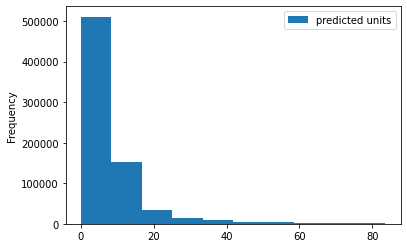

In [ ]:
predicted_unit_count[predicted_unit_count < predicted_unit_count.quantile(.99)].plot.hist()

In [ ]:
##